<a href="https://colab.research.google.com/github/johnjustine5646/AML_Labs_Trisem2/blob/main/Lab2_AML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/content/Program_1_Dataset.csv')
df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [5]:
df.columns

Index(['Crime_Rate', 'Zone_proportion', 'Non_Retail_Acres', 'CHAS', 'NOX',
       'Avg_rooms ', 'AGE', 'Distance', 'RAD', 'Property_TaxRate', 'PTRATIO',
       'B', 'LSTAT', 'MValue'],
      dtype='object')

In [6]:
df.shape

(506, 14)

In [7]:
df.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.dtypes

Crime_Rate          float64
Zone_proportion     float64
Non_Retail_Acres    float64
CHAS                  int64
NOX                 float64
Avg_rooms           float64
AGE                 float64
Distance            float64
RAD                   int64
Property_TaxRate      int64
PTRATIO             float64
B                   float64
LSTAT               float64
MValue              float64
dtype: object

In [9]:
df=pd.DataFrame(df)

In [18]:
#features
X = df[['Avg_rooms ','Distance','Property_TaxRate','Non_Retail_Acres','MValue']]
y = df['MValue']

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.Series([variance_inflation_factor(X.values,idx)
                for idx in range (X.shape[1])],
                index = X.columns)
print(vif)

Avg_rooms           51.970433
Distance             7.279481
Property_TaxRate    15.072909
Non_Retail_Acres    10.196541
MValue              15.554258
dtype: float64


In [20]:
X=X.drop(columns=['Distance'])

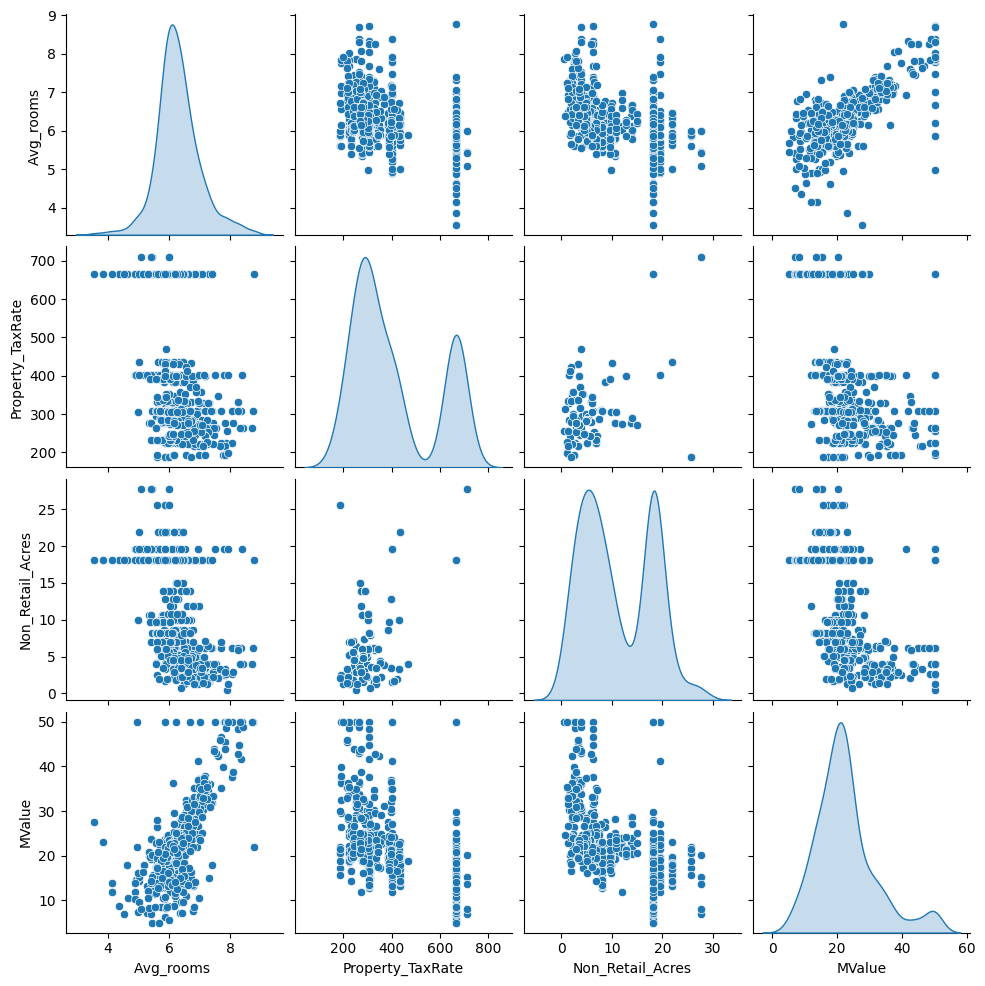

In [21]:
sns.pairplot(X, diag_kind="kde")

In [22]:
X=X.drop(columns=['MValue'])

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=model.predict(X_test)

In [31]:
coefficient = model.coef_
intercept = model.intercept_

In [32]:
print(f'Coefficient:{coefficient}')
print(f'Intercept:{intercept}')

Coefficient:[ 8.01991779 -0.01345506 -0.05787833]
Intercept:-21.5635031937259


In [38]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_train)
mse_train = mean_squared_error(y_train, y_pred)
r2_train = r2_score(y_train, y_pred)
Adj_r2=1-(1-r2_train)*(len(y)-1/len(y)-X.shape[1]-1)

print(f'Training Set Metrics:')
print(f'Mean Squared Error: {mse_train}')
print(f'R-squared: {r2_train}')
print(f'Adjusted_r2:{Adj_r2}')

y_pred=model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)
Adj_r2=1-(1-r2_train)*(len(y)-1/len(y)-X.shape[1]-1)

print('\nTesting Set Metrics:')
print(f'Mean Squared Error: {mse_test}')
print(f'R-squared: {r2_test}')
print(f'Adjusted_r2:{Adj_r2}')

Training Set Metrics:
Mean Squared Error: 41.767838187970796
R-squared: 0.5421621168754323
Adjusted_r2:-228.83371251058216

Testing Set Metrics:
Mean Squared Error: 27.194563356414253
R-squared: 0.6131522277463147
Adjusted_r2:-228.83371251058216


In [35]:
len(y)

506

In [36]:
len(X.shape)

2